In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import pickle as pkl
from itertools import product
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tqdm import tqdm
from matplotlib import pyplot as plt
from datetime import timedelta, datetime
from joblib import delayed, Parallel
from copy import copy

from core import  do_simulation
from helpers import Params, T, get_T1_and_T2, R0, plot_total, DATE_FORMAT, total_to_csv

from const import STATE, COLORS, NUM_STATES,  STATES


In [3]:
trans_2019 = np.array([3.73, 3.51, 4.3, 4.46, 4.27, 4.34, 4.42, 3.7, 3.45, 4.2, 4.14, 4.13, 4.29, 4.15, 3.49, 3.27, 3.95, 3.81, 3.59, 3.55, 3.09, 2.85, 2.32, 1.99, 2.03, 2.0, 1.89, 1.91, 1.99, 2.17, 2.94, 3.32, 3.56, 3.66, 3.64, 3.16, 3.09, 3.98, 3.82, 4.01, 4.05, 4.27, 3.69, 3.54, 4.34, 4.28, 4.38, 4.62, 4.7, 3.92, 3.83, 4.5, 4.55, 4.51, 4.73, 4.03, 3.9, 4.59, 4.63, 4.65])
tran_coef_after_ld = np.array([0.66 ,0.67 ,0.68 ,0.66 ,0.69 ,0.69 ,0.66 ,0.69 ,0.68 ,0.67 ,0.60 ,0.62 ,0.61 ,0.62 ,0.62 ,0.61 ,0.60 ,0.62 ,0.67 ,0.60 ,0.58 ,0.59 ,0.58 ,0.57 ,0.59 ,0.60 ,0.57 ])
infection_factor = np.mean(trans_2019) / np.mean(tran_coef_after_ld)
infection_factor = np.log(infection_factor)
infection_factor


1.770415654913046

In [4]:
params_jan27 = pkl.load(
    open('output/params_after_lockdown.pkl', 'rb')
)

In [5]:
params_before = pkl.load(
    open('output/params_before_lockdown.pkl', 'rb')
)

params_after = pkl.load(
    open('output/params_after_lockdown.pkl', 'rb')
)



In [6]:
p0_time = pkl.load(open('output/p0_time.pkl', 'rb'))
p0_time = datetime(year=2018,  month=p0_time.month, day=p0_time.day)
bed_info = [
    (0, 3000), # 3000),
]

In [7]:
params = copy(params_jan27)
params.alpha = infection_factor * params_jan27.alpha
params.beta = infection_factor * params_jan27.beta
params.initial_num_E = 1
params.initial_num_I = 0
params.initial_num_M = 0


In [8]:
total, _, _, r0_info = do_simulation(360, bed_info, params, verbose=0)

100%|██████████| 360/360 [01:12<00:00,  4.93it/s]


In [9]:
r0_info

{0: (6.014909469640959, 28.8935174257995, 4.399599799482123)}

In [10]:
total_to_csv(p0_time, 360, total, f'output/tbl/simulation_last_year.csv')

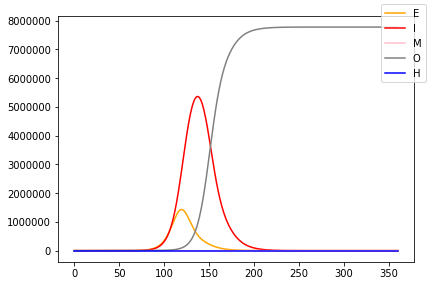

In [11]:
fig, ax = plot_total(total)
fig
fig.savefig('figs/simulation-last-year.pdf')